<a href="https://colab.research.google.com/github/Gdan0326/Caffeine_Content_Metrics/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [3]:
file = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo/First Portfolio Project/sales_predictions_2023.csv'
df = pd.read_csv(file)

In [4]:
# How many rows and columns?
df.shape

(8523, 12)

In [5]:
# What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Are there duplicates? If so, drop any duplicates
df[df.duplicated()]  # no duplicates
df = df.drop_duplicates()
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
#  Identify missing values
print(df.isna().sum().sum(), 'missing values')

3873 missing values


In [8]:
df[df.isna().any(axis=1)].shape

(3873, 12)

In [9]:
# Define features (X) and target (y).
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
# Train test split the data to prepare for machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# separate num and cat columns
num_selector = make_column_selector(dtype_include='number')
cat_selector= make_column_selector(dtype_include='object')
# select the numeric column of each type
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)
# checck for list
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
categorical columns are ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [11]:
# Use pipelines and column transformers to complete the following tasks:
# Impute any missing values. Use the ‘mean’ strategy for numeric columns and the ‘most_frequent’ strategy for categorical columns.
# imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# scaler
scaler = StandardScaler()
# one hot encoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [12]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [13]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [14]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c21886ce0e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c21886cf8e0>)])

In [15]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c21886ce0e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c21886cf8e0>)])

In [16]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

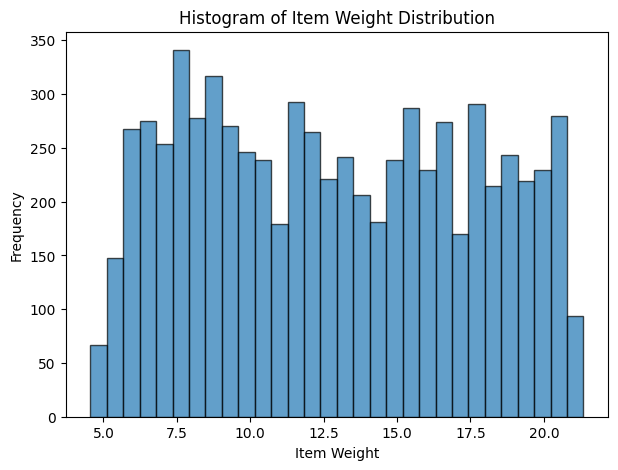

In [17]:
# Plot histogram for Item_Weight
# The distribution of item weight appears to be uniform or normal distribution, several items falling from 12.5 - 17.5 units
plt.figure(figsize=(7,5))
plt.hist(df['Item_Weight'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Item Weight Distribution')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

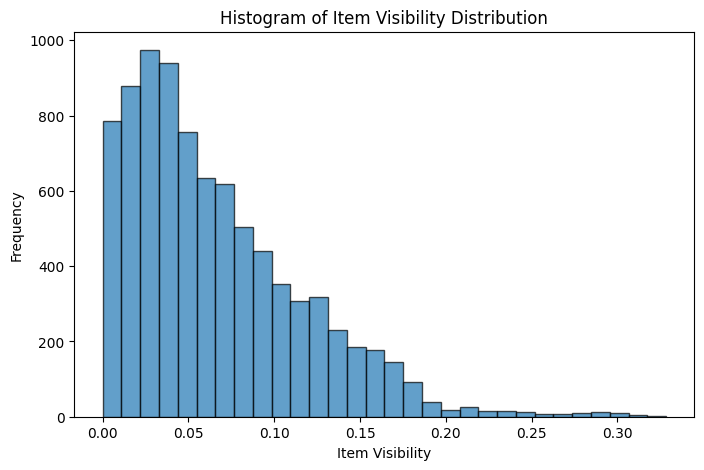

In [18]:
# Plot histogram for Item_Visibility
# The distribution of item visibility is right skewed, indicative of most items have very low visibility
plt.figure(figsize=(8, 5))
plt.hist(df['Item_Visibility'], bins = 30, edgecolor ='k', alpha=0.7)
plt.title('Histogram of Item Visibility Distribution')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

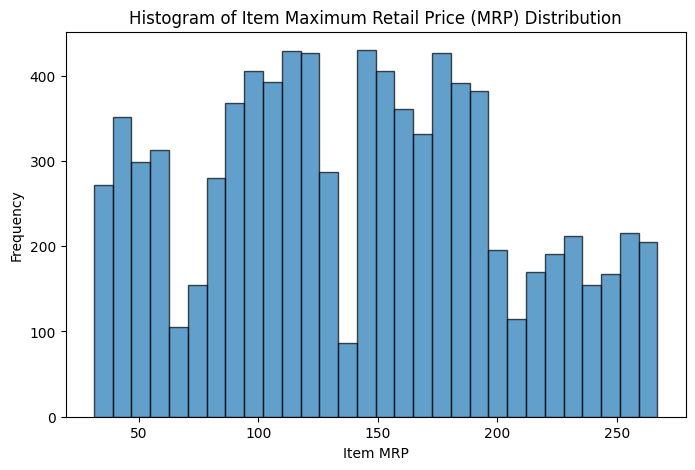

In [19]:
# Plot histogram for Item_MRP Distribution
# The distribution of Item MRP shows varying peaks which indicates that there are variety of goods sold at different price ranges
plt.figure(figsize=(8, 5))
plt.hist(df['Item_MRP'], bins = 30, edgecolor ='k', alpha =0.70)
plt.title('Histogram of Item Maximum Retail Price (MRP) Distribution')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

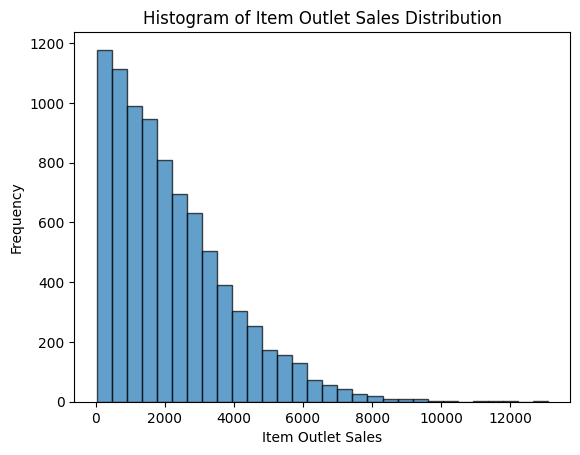

In [20]:
# Plot histogram for Item Outlet Sales
# The histogram of Item Outlet Sales Distribution reflects a positive distribution or right skewed which indicates that most of the items have 0 to low sales, while very few items have high sales
plt.hist(df['Item_Outlet_Sales'], bins = 30, edgecolor ='k', alpha =0.70)
plt.title('Histogram of Item Outlet Sales Distribution')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

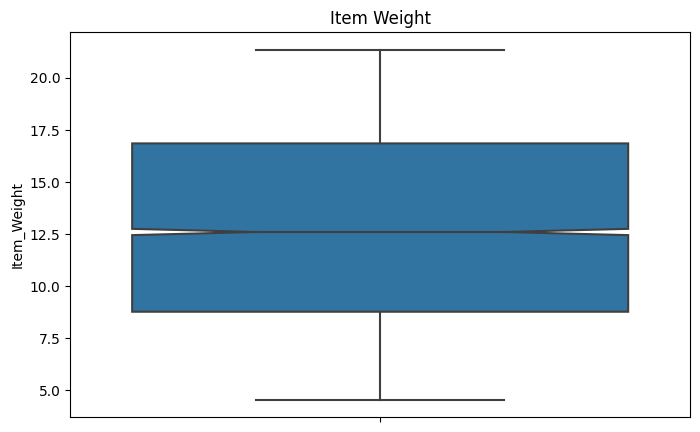

In [21]:
# Plot Boxplot for Item Weight
# from the boxplot we can infer that the median weight is around 12.5 units, and most of the items fall between 8.8 -17 units
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Item_Weight'], notch = True)
plt.title('Item Weight')
plt.show()

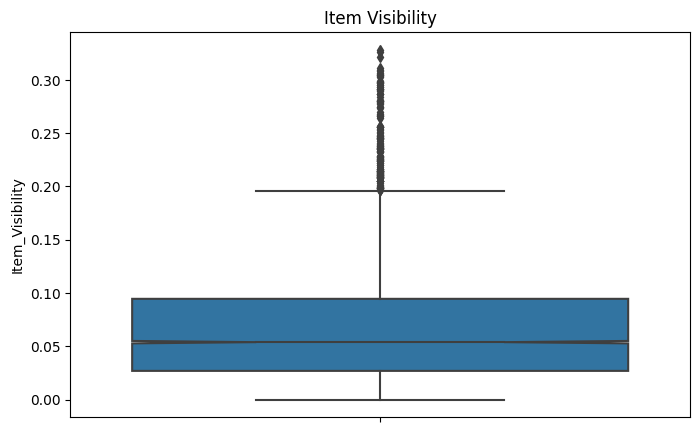

In [22]:
# Plot Boxplot for Item Visibility
# The figure shows that most of the items has low visibility from 0.2 to a median of .053
# while some of the items have higher visibility shown as outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Item_Visibility'], notch = True)
plt.title('Item Visibility')
plt.show()

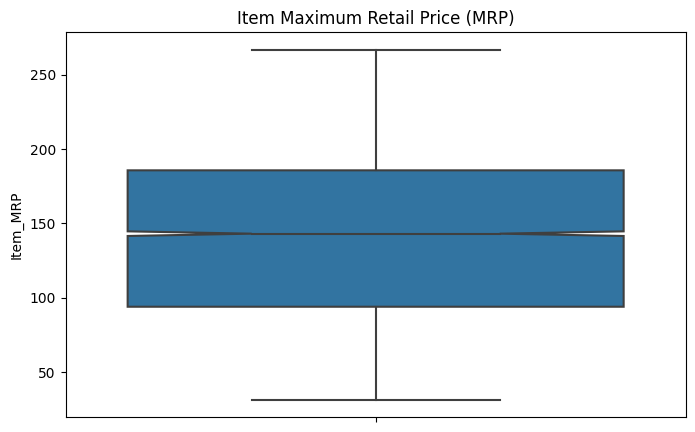

In [23]:
# Plot Boxplot for Item MRP
# The boxplot shows that the Median for MRP is around 143
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Item_MRP'], notch = True)
plt.title('Item Maximum Retail Price (MRP)')
plt.show()

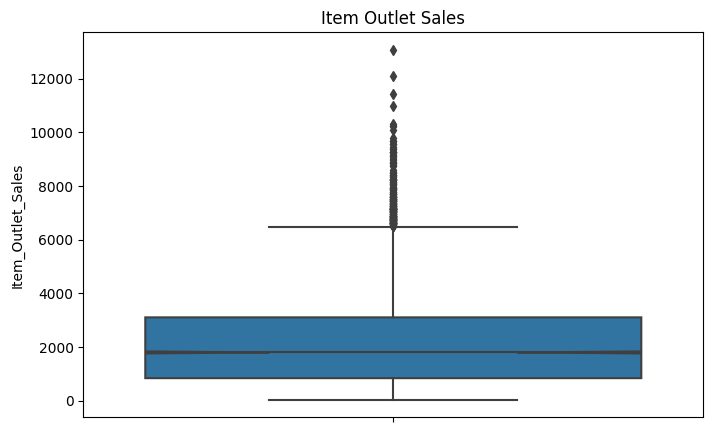

In [24]:
# Plot Boxplot for Item MRP
# The boxplot shows that the Median for MRP is around 1795 with outlier that indicates that some items have very high sales
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Item_Outlet_Sales'], notch = True)
plt.title('Item Outlet Sales')
plt.show()

<ipython-input-25-701ccabc1e10>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


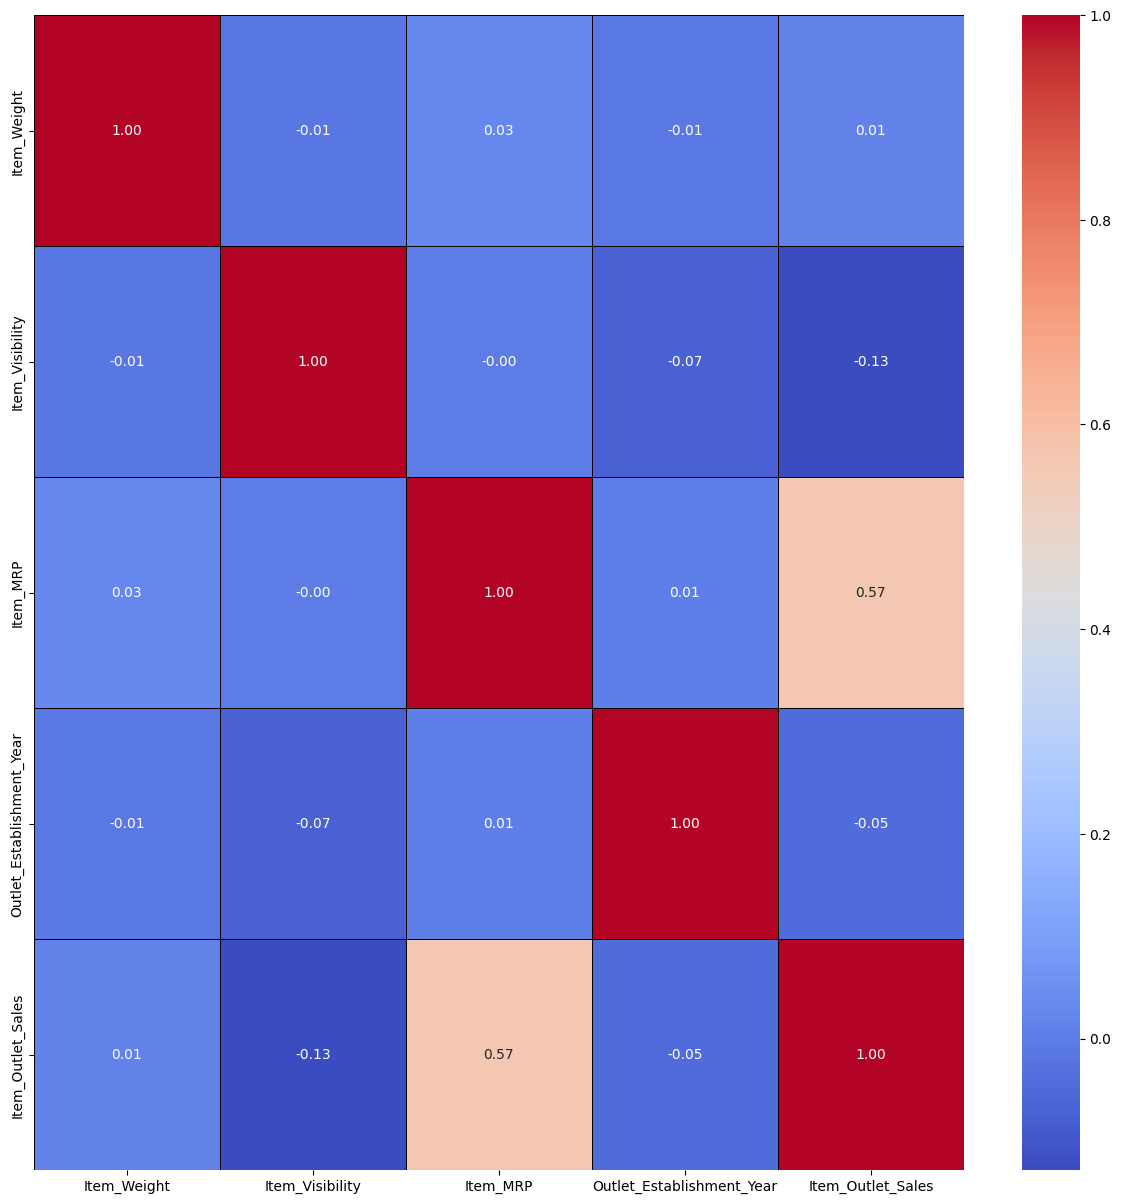

In [25]:
# Heatmap of the correlation between features
#  There is a moderate positive correlation between Item_MRP and Item_Outlet_Sales, this means that the higher MRP the more likely it will have higher sales
corr = df.corr()
plt.figure(figsize = (15,15));
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = '.2f', lw=.5, linecolor='k');

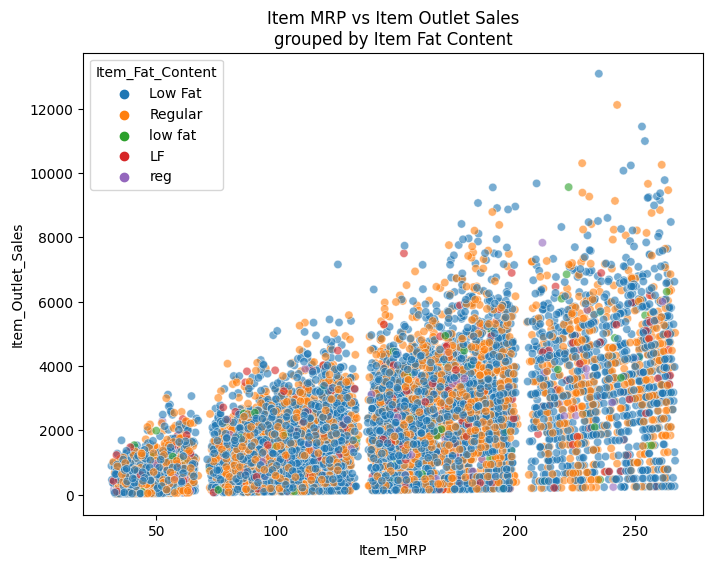

In [26]:
# scatter plot to show the relationship between Item_MRP, Item_Outlet_Sales, and Item_Fat_Content
# The spread of sales of Low Fat items is wider than the Regular fat content which suggests that low fat content items has higher sales
# items with lower to moderate MRP have notable number of higher sales especially in low fat content items
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=df, alpha=0.6)
plt.title('Item MRP vs Item Outlet Sales\ngrouped by Item Fat Content')
plt.show()

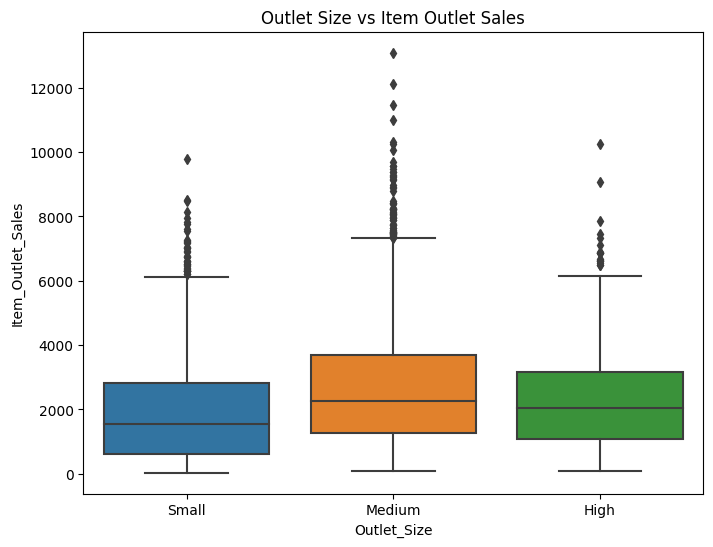

In [27]:
# Analyze relationship of Outlet Size and Item Outlet Sales
# High Outlet size displayed the highest median sales value, followed by medium outlet size and last is the small outlet size
# from the graph it can be inferred that outlet size have influence on the item outlet sales
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'Outlet_Size', y ='Item_Outlet_Sales', data = df, order =['Small', 'Medium', 'High'])
plt.title('Outlet Size vs Item Outlet Sales')
plt.show()